# REVOLUTIONIZING WASTE SEGREGATION USING DEEP LEARNING

### Importing Libraries

In [1]:
import os 
import tensorflow.keras
import numpy as np
import pandas as pd
import tensorflow as tf
# Data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model 
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# Callbacks 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Transfer Learning Model 
from tensorflow.keras.applications import ResNet50, ResNet50V2, ResNet152, ResNet152V2, InceptionV3, Xception

### Loading Dataset

In [2]:
root_path = 'C:\\Users\\ayush\\Downloads\\archive (43)\\Bag Classes\\Bag Classes'

class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

print(f"Number of Classes : {n_classes}")

Number of Classes : 3


#### This Dataset Contains Synthetic Images of Plastic, Paper, and Garbage Bags. The Bag Classes folder contains 5000 images of each image class separately .The dataset can be used to bags Classification using ResNet50.

In [7]:
import os

class_dis = [len(os.listdir(os.path.join(root_path, name))) for name in class_names]

# Print the class distribution
for name, count in zip(class_names, class_dis):
    print(f"Class {name}: {count} directories")

Class Garbage Bag Images: 5000 directories
Class Paper Bag Images: 5000 directories
Class Plastic Bag Images: 5000 directories


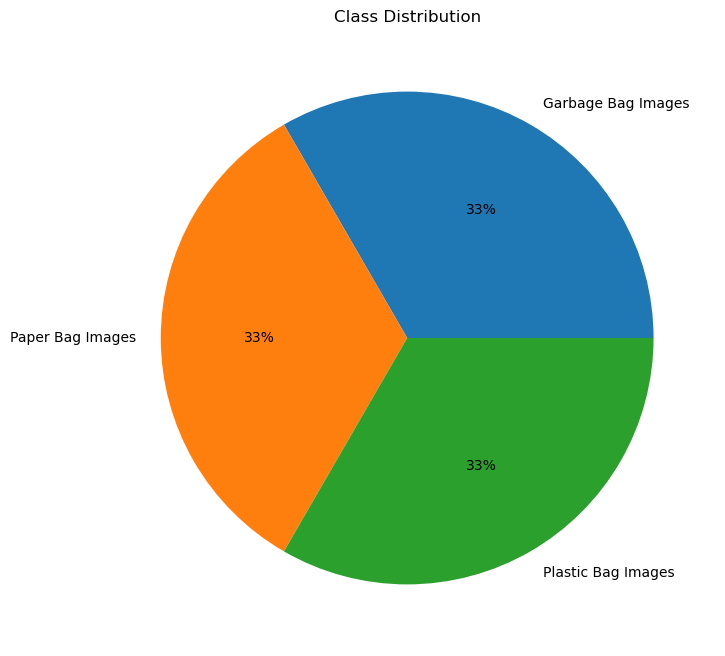

In [8]:
plt.figure(figsize=(10,8))
plt.pie(labels=class_names, x=class_dis, autopct='%.0f%%')
plt.title("Class Distribution")
plt.show()

In [6]:
# Initialize Generator 
gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    validation_split=0.2
)


# Load Data 
train_ds = gen.flow_from_directory(root_path, target_size=(256,256), shuffle=True, batch_size=32, subset='training', class_mode='binary')
valid_ds = gen.flow_from_directory(root_path, target_size=(256,256), shuffle=True, batch_size=32, subset='validation', class_mode='binary')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [10]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

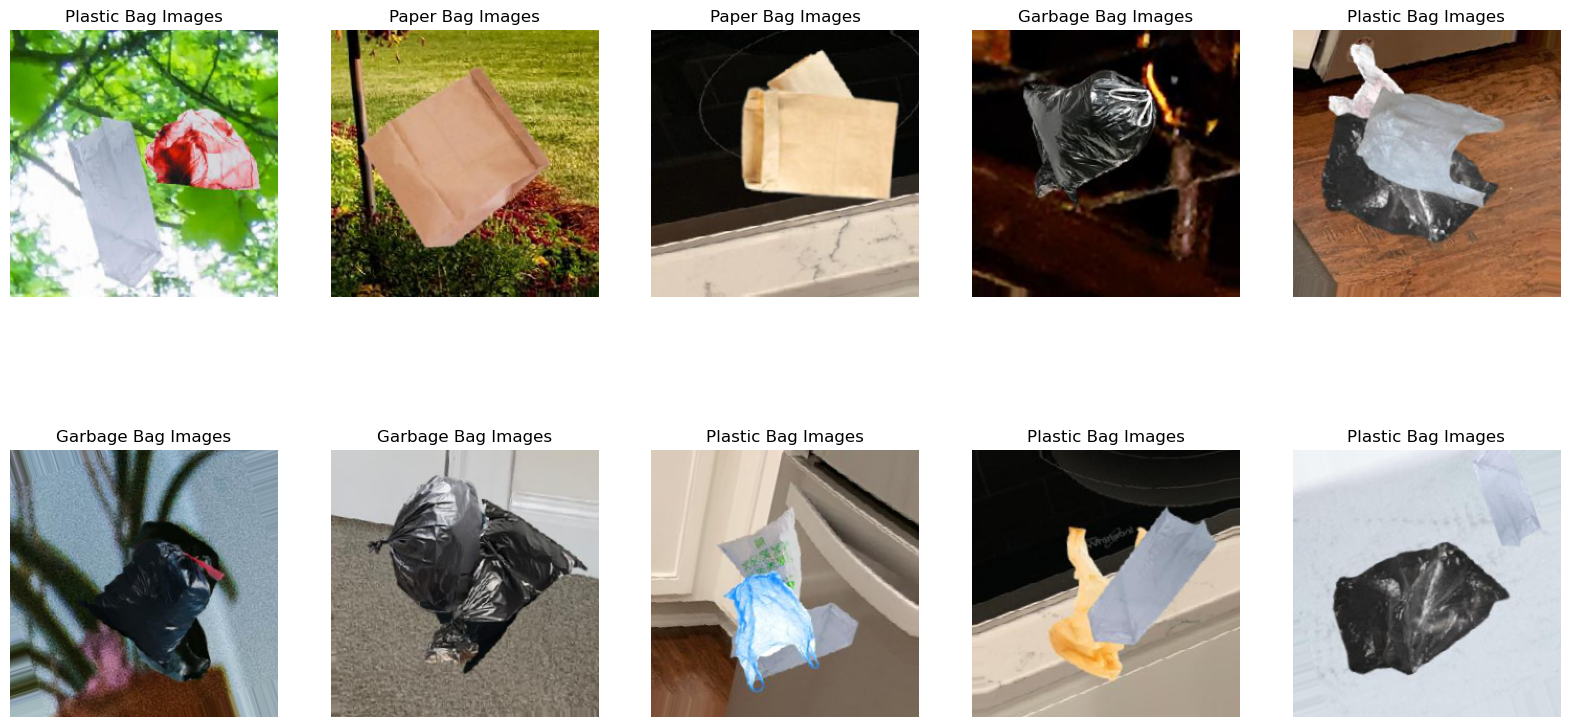

In [11]:
i = 1
plt.figure(figsize=(20,10))
for images, labels in train_ds:
    
    # Get random Image, label
    id = np.random.randint(len(images))
    image, label = images[id], labels[id]
    
    # Plot Image
    plt.subplot(2,5,i)
    show_image(image, title=class_names[int(label)])
    
    i+=1
    if i>=11: break
plt.show()



### This code is a useful way to visualize a random sample of the images in a training dataset, and can be used to get a quick sense of what types of images are in the dataset and whether they are labeled correctly.

### RESNET50V2

In [8]:
# Load Pretrained Model 
base_model = ResNet50V2(include_top=False, input_shape=(256,256,3))
base_model.trainable = False # Freeze weights

# Model Name
name = 'GarbageBagClassifier-ResNet50V2'

# Model Architecture
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
], name=name)

# Compilekm;
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks 
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]

# Train
history = model.fit(train_ds, validation_data=valid_ds, epochs=10, callbacks=cbs)
model.save('my_model.keras')

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.1357 - accuracy: 0.9495

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 1105s 3s/step - loss: 0.1357 - accuracy: 0.9495 - val_loss: 0.0641 - val_accuracy: 0.9763
Epoch 2/10
375/375 [==============================] - 967s 3s/step - loss: 0.0634 - accuracy: 0.9765 - val_loss: 0.0487 - val_accuracy: 0.9810
Epoch 3/10
375/375 [==============================] - 876s 2s/step - loss: 0.0436 - accuracy: 0.9847 - val_loss: 0.0405 - val_accuracy: 0.9860
Epoch 4/10
375/375 [==============================] - 875s 2s/step - loss: 0.0365 - accuracy: 0.9869 - val_loss: 0.0739 - val_accuracy: 0.9780
Epoch 5/10
375/375 [==============================] - 875s 2s/step - loss: 0.0332 - accuracy: 0.9875 - val_loss: 0.0386 - val_accuracy: 0.9863
Epoch 6/10
375/375 [==============================] - 874s 2s/step - loss: 0.0290 - accuracy: 0.9889 - val_loss: 0.0491 - val_accuracy: 0.9823
Epoch 7/10
375/375 [==============================] - 1231s 3s/step - loss: 0.0239 - accuracy: 0.9912 - val_loss: 0.0367 - val_accuracy: 0.9867
Epoch 8/

In [2]:
model = load_model('my_model.keras')

## DENSENET201

74836368/74836368 [==============================] - 15s 0us/step
Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.1234 - accuracy: 0.9542

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 2338s 6s/step - loss: 0.1234 - accuracy: 0.9542 - val_loss: 0.0603 - val_accuracy: 0.9777
Epoch 2/10
375/375 [==============================] - 1819s 5s/step - loss: 0.0585 - accuracy: 0.9791 - val_loss: 0.0542 - val_accuracy: 0.9793
Epoch 3/10
375/375 [==============================] - 1809s 5s/step - loss: 0.0442 - accuracy: 0.9833 - val_loss: 0.0560 - val_accuracy: 0.9813
Epoch 4/10
375/375 [==============================] - 2160s 6s/step - loss: 0.0395 - accuracy: 0.9857 - val_loss: 0.0377 - val_accuracy: 0.9863
Epoch 5/10
375/375 [==============================] - 2297s 6s/step - loss: 0.0321 - accuracy: 0.9877 - val_loss: 0.0728 - val_accuracy: 0.9740
Epoch 6/10
375/375 [==============================] - 34259s 92s/step - loss: 0.0340 - accuracy: 0.9880 - val_loss: 0.0405 - val_accuracy: 0.9843
Epoch 7/10
375/375 [==============================] - 2260s 6s/step - loss: 0.0295 - accuracy: 0.9886 - val_loss: 0.0516 - val_accuracy: 0.9810


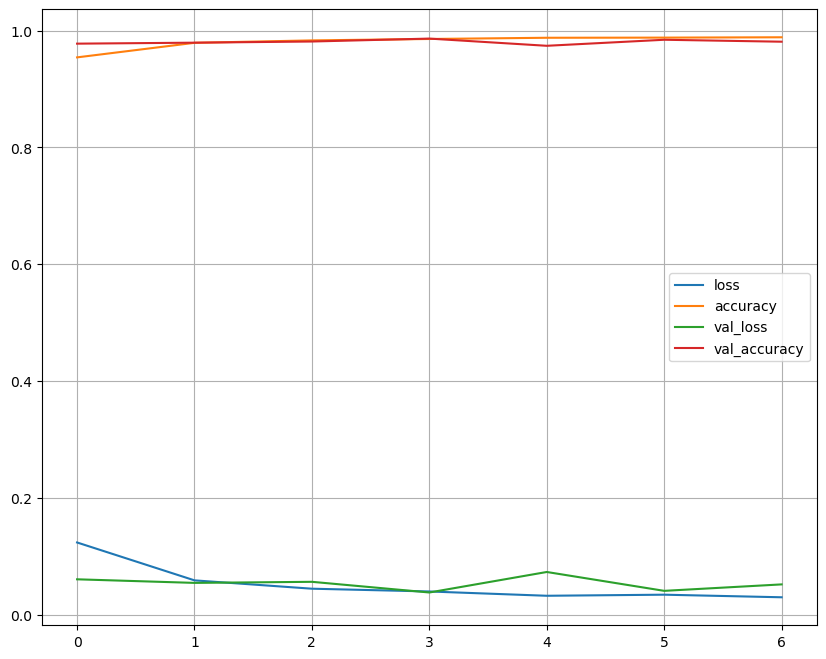

In [9]:
from tensorflow.keras.applications import DenseNet201

# Load Pretrained Model 
base_model_densenet = DenseNet201(include_top=False, input_shape=(256,256,3))
base_model_densenet.trainable = False # Freeze weights

# Model Name
name_densenet = 'GarbageBagClassifier-DenseNet201'

# Model Architecture
model_densenet = Sequential([
    base_model_densenet,
    GAP(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
], name=name_densenet)

# Compile Model
model_densenet.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks 
cbs_densenet = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name_densenet + ".h5", save_best_only=True)]

# Train
history_densenet = model_densenet.fit(train_ds, validation_data=valid_ds, epochs=10, callbacks=cbs_densenet)

# Plot training history
pd.DataFrame(history_densenet.history).plot(figsize=(10,8))
plt.grid()
plt.show()


### Model Prediction using Resnet50V2 as Resnet50V2 gives better results as compared to Densenet201

1/1 [==============================] - 0s 109ms/step


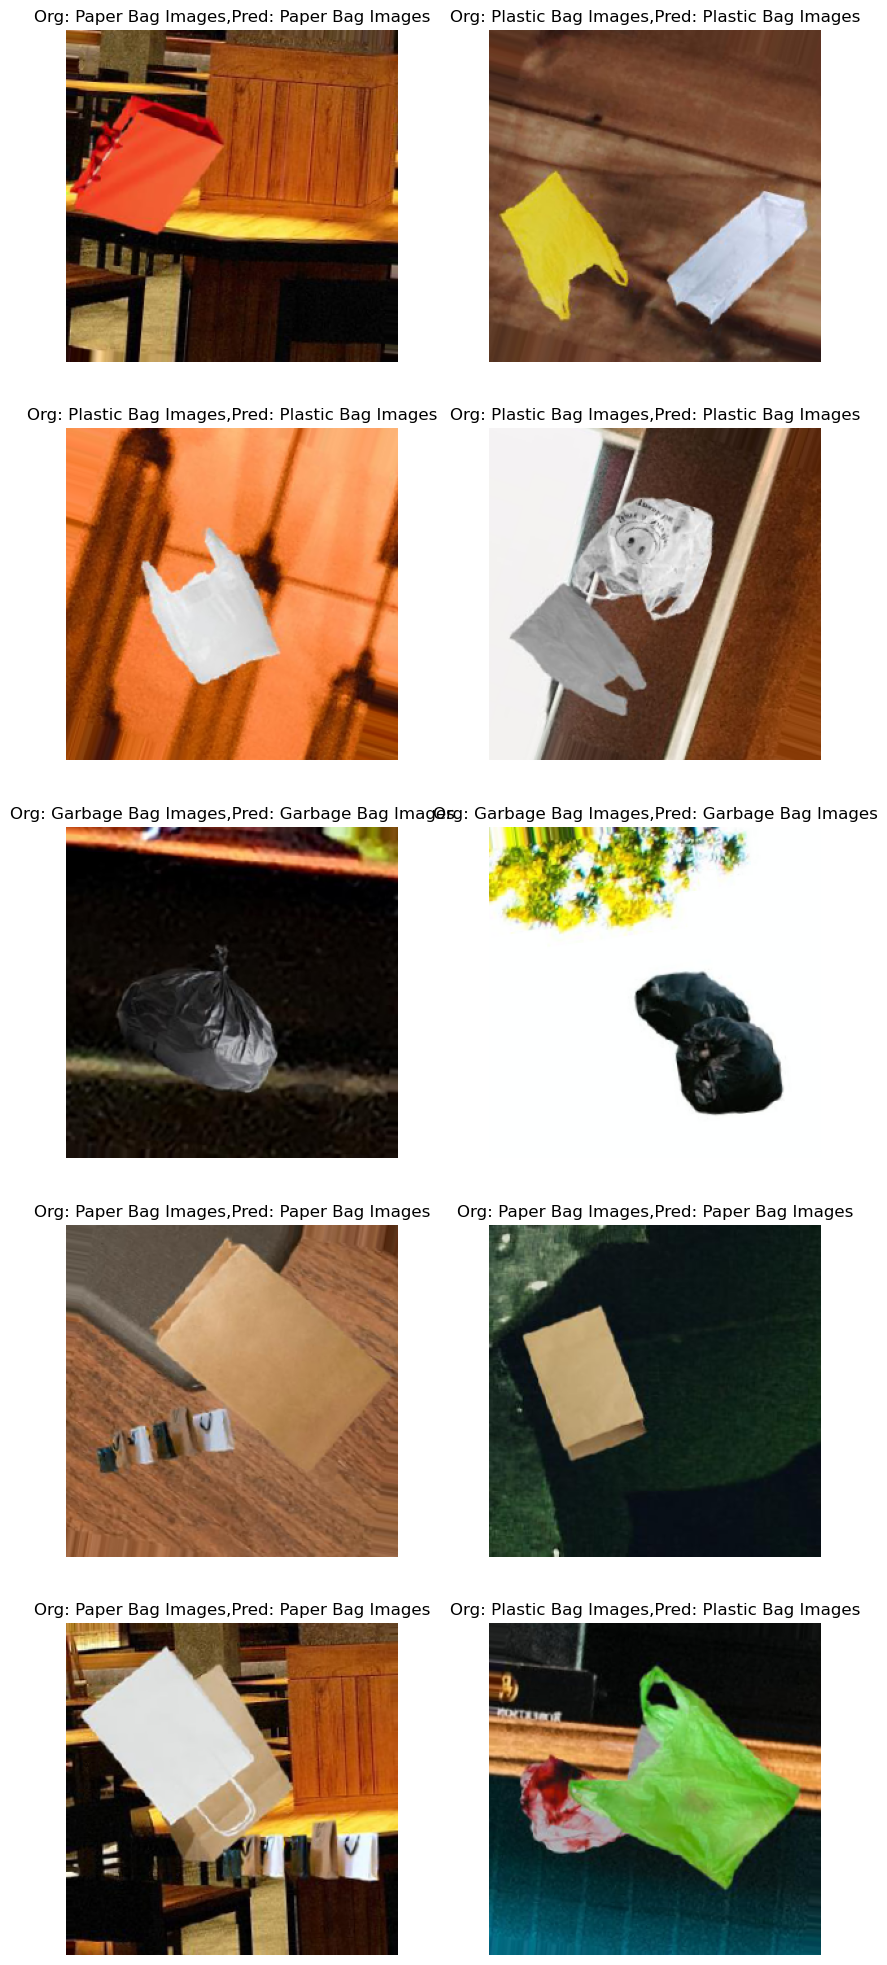

In [12]:
i = 1
plt.figure(figsize=(10,25))
for images, labels in valid_ds:
    
    # Get random Image, label
    id = np.random.randint(len(images))
    image, label = images[id], labels[id]
    pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
    
    # Plot Image
    plt.subplot(5,2,i)
    show_image(image, title="Org: {},Pred: {}".format(class_names[int(label)], pred_label))
    
    i+=1
    if i>=11: break
plt.show()

In [10]:
!pip install opencv-python

## Object Detection using Open Cv

In [3]:
import cv2

# Load your trained model
model = load_model('GarbageBagClassifier-ResNet50V2.h5')

# Define the class names
class_names = ["Garbage Bag Images", "Paper Bag Images", "Plastic Bag Images"]

# Open the default camera (camera index 0)
video = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not video.isOpened():
    print("Failed to open the camera")
else:
    while True:
        # Read a frame from the camera
        ret, frame = video.read()

        if not ret:
            print("Failed to capture a frame")
            break

        # Resize the frame to match the input size of your model (256x256)
        resized_frame = cv2.resize(frame, (256, 256))

        # Preprocess the frame (normalize and expand dimensions)
        input_frame = np.expand_dims(resized_frame / 255.0, axis=0)

        # Make a prediction using your model
        predictions = model.predict(input_frame)

        # Get the predicted class label
        predicted_class_index = np.argmax(predictions)
        predicted_class = class_names[predicted_class_index]

        # Display the frame with the predicted class
        cv2.putText(frame, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Bag Classification", frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close the OpenCV window
    video.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 500ms/step
